In [125]:
import numpy as np
from sys import argv
import matplotlib.pyplot as plt
import cProfile
import re
import pstats
import time
from sklearn import tree
%matplotlib inline

In [126]:
file_of_primes = "primes1.txt"
num_primes_to_use = 7
binary_number_lengths = 24
plot_diffs = False

In [158]:
def load_numbers_and_put_in_array(file_name):
    """Loads numbers from a text file and returns as nice, 1D array containing all the numbers in the file"""
    numbers = np.genfromtxt(file_name,dtype='int32')
    numbers = np.ndarray.flatten(numbers)
    return numbers

In [128]:
def get_training_samples(primes):
    """Takes in array of primes (ordered by increasing value) and creates numpy array of integers up to and including
       the largest number in the primes array"""
    return np.arange(primes[-1]+1) # add 1 so that largest prime is included in array

In [129]:
def convert_number_to_binary(number, num_bits):
    """Converts individual numbers into the binary representation of the length we want to use"""
    return np.binary_repr(number, width=num_bits)

In [130]:
def convert_array_to_binary(number_array, num_bits):
    """Converts individual numbers into the binary representation of the length we want to use"""
    bin_array = np.array([np.binary_repr(number, width=num_bits) for number in number_array])
    
    # convert binary strings into vectors of bools.  e.g.: '1010011' --> [1,0,1,0,0,1,1]
    return [[int(i) for i in element] for element in bin_array]

In [131]:
def classify_training_samples(num_array, primes):
    """Takes in array of all training samples and another of all primes (ordered by increasing value) being used
       and creates numpy array of integers up to and including the largest number in the primes array, and simply
       assigns a value of 0 or 1 at each index, depending on whether the number is prime:
           1: number is prime
           0: number is not prime"""
    classes = np.zeros(num_array[-1]+1) # add 1 so that largest number is included in array
    for i in primes:
        classes[i] = 1
    return classes

In [132]:
def learn_classification(training_samples, training_sample_classes):
    """Make the classifier for the training data"""
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(training_samples, training_sample_classes)
    return clf

In [156]:
def predict_for_more_numbers(max_number, clf, primes, binary_number_lengths):
    """Tries predicting for numbers that weren't trained upon, using an array containing only numbers after those upon
       which the classifier was trained"""
    num_array = np.arange(primes[-1], max_number)
    binary_num_array = convert_data(num_array, binary_number_lengths)
    print(binary_num_array)
    return clf.predict([binary_num_array])

In [145]:
def convert_data(num_array, binary_number_lengths):
    """Converts an array of numbers to the format needed for machine learning: binary"""
    num_array = [string(element) for element in num_array]
    binary_training_samples = convert_array_to_binary(num_array, binary_number_lengths)
    return binary_training_samples

In [162]:
primes = load_numbers_and_put_in_array(file_of_primes)
training_primes = primes[0:min(len(primes),int(num_primes_to_use))+1]


In [160]:
def do_machine_learning(file_name, num_primes_to_use, training_primes, binary_number_lengths):
    """Calls all the helper functions to do the machine learning"""
#     primes = load_numbers_and_put_in_array(file_name, num_primes_to_use)
    print("got primes")
    training_samples = get_training_samples(training_primes)
    print("got training samples")
    binary_training_samples = convert_array_to_binary(training_samples, binary_number_lengths)
    print("got binary representations")
    classifications = classify_training_samples(training_samples, primes)
    print("got classifications")
    classifier = learn_classification(binary_training_samples, classifications)
    print("got classifier")
    return predict_for_more_numbers(num_primes_to_use*2, classifier, primes, binary_number_lengths)

In [163]:
x = do_machine_learning(file_of_primes, num_primes_to_use, training_primes, binary_number_lengths)
print(x)

got primes
got training samples
got binary representations


IndexError: index 23 is out of bounds for axis 0 with size 20

In [69]:
x=np.arange(400000)
t0 = time.clock()
y=convert_array_to_binary(x,20)
print(y[-1])
print(time.clock()-t0)
t0 = time.clock()
z=[convert_number_to_binary(i,20) for i in x]
print(z[-1])
print(time.clock()-t0)

01100001101001111111
3.190238
01100001101001111111
3.300214


In [144]:
x= '0101001011011010101111'
print([i for i in x])

['0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1']


In [36]:
ints = np.random.randint(10,high=100,size=10)
print(ints)
array = np.arange(max(ints))
classes = np.zeros(len(array)+1)
for i in ints: # puts 1 at every index, using natural indexing; i.e.: print(classes[34]) will print 1 if 34 is in ints
    # array, else 0
    classes[i] = 1
print(classes)

[51 72 27 77 41 35 16 54 28 18]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  1.]


In [39]:
print(classes[50])

0.0


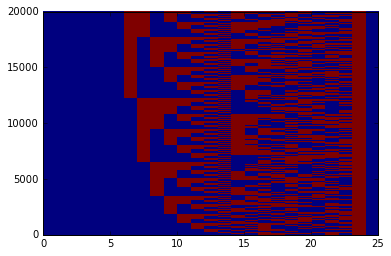

4.043304


In [21]:
# this cell has some nasty stuff I used to plot the binary representations to visualize them

totalTime = time.clock()

my_nums = np.genfromtxt(file_of_primes)
my_nums = np.ndarray.flatten(my_nums)
my_nums = my_nums[0:int(num_primes_to_use)]

if plot_diffs == False:
    binaries = [np.binary_repr(x,width=24) for x in my_nums]
    x_axis = []
    y_axis = []
    x_appender = x_axis.append # localize methods for slightly better performance
    y_appender = y_axis.append

    # now, get pts with a 1 in them, and make a list of these pts.  For each successive binary number, we need
    # to increment the number we put in the array by a fixed amount, so the plotted pts for each number don't overlap.
    # We then need to append an appropriate value to the end of the x_axis array
    for i in xrange(len(binaries)):
        for bit in xrange(len(binaries[i])):
            if binaries[i][bit]=='1': # if bit is 1
                x_appender(bit)
                y_appender(i)

    plt.hist2d(x_axis,y_axis,bins=[range(26),range(int(num_primes_to_use)+1)])
    plt.xlim(0,25)
    plt.show()

else: # if we wanted to plot differences between successive primes
    diffs = [my_nums[i+1] - my_nums[i] for i in xrange(len(my_nums)-1)]
    diffs_x_axis = []
    diffs_y_axis = []

    binary_diffs = [np.binary_repr(x,width=24) for x in diffs]

    for i in xrange(len(binary_diffs)):
        for bit in xrange(len(binary_diffs[i])):
            if binary_diffs[i][bit]=='1':
                diffs_x_axis.append(bit)
                diffs_y_axis.append(i)

    plt.hist2d(diffs_x_axis,diffs_y_axis,bins=[range(26),range(int(num_primes_to_use)+1)])
    plt.xlim(17 ,25)
#     plt.show()

print(time.clock() - totalTime)